pressure at 25C: 3.806326458e-05
pressure at 30C: 5.91815149207e-05
pressure at 35C: 9.94657284821e-05
pressure at 40C: 0.000211929770774
pressure at 45C: 0.000636222779795


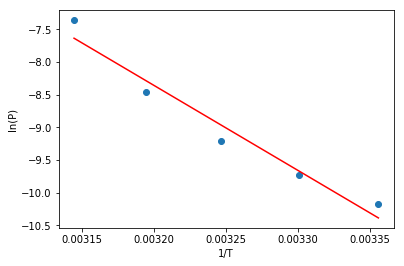

gradient: -13042.6651786
intercept 33.3794396145
r-squared: 0.956424609781
delHsub: 108.436718295
delSsub: 277.516660955
P298: 3.08031623462e-05


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats  # Import the required packages

def VP_function (R, B_R, S, B_S, T, ICSR, ICSS): # function to calculate pressure of sample at a given temperature
    MZ = R[:,0]                                  # mass charge ratio 
    RIC = R[:,1]                                 # reference ion current
    B_RIC = B_R[1]                               # background reading of the reference ion current
    CRIC = RIC - B_RIC                           # corrected reference ion current
    INT = np.trapz(CRIC,MZ)                      # integral of the reference ion current
    PR = np.exp(-11058.97/T+29.54)               # pressure of reference at given temperature. NOTE: -11058.97 and 29.54 are specific to malonic acid as a reference and will change depending on the reference used
    CF = PR/(INT/ICSR)                           # correction factor
    SIC = S[:,1]                                 # sample ion current
    B_SIC = B_S[1]                               # background reading of the sample ion current
    CSIC = SIC-B_SIC                             # corrected sample ion current
    SINT = np.trapz(CSIC,MZ)                     # integral of ther sample ion current
    PS = CF*(SINT/ICSS)                          # pressure of sample
    return PS

# R is reference run using the np.loadtxt to read in and skiprows to start at m/z41
# B_R is the background reading for R
# S is the sample run, B_S is the background of the sample
# T is the temperature of the run
# ICSR and ICSS are the ionisation cross sections of the reference and the sample respectively

T1 = 298 # temperature of run 1 
T2 = 303 # temperature of run 2 ect...
T3 = 308
T4 = 313
T5 = 318

PS25 = VP_function(np.loadtxt("malonic_acid_25c.asc", skiprows=2581), np.loadtxt("malonic_acid_background.asc", skiprows=14100), np.loadtxt("xylitol_25c.asc", skiprows=2581), np.loadtxt("xylitol_gateopen.asc", skiprows=14100), T1, 12.457, 19.376)
PS30 = VP_function(np.loadtxt("malonic_acid_30c.asc", skiprows=2581), np.loadtxt("malonic_acid_background.asc", skiprows=14100), np.loadtxt("xylitol_30c.asc", skiprows=2581), np.loadtxt("xylitol_gateopen.asc", skiprows=14100), T2, 12.457, 19.376)
PS35 = VP_function(np.loadtxt("malonic_acid_35c.asc", skiprows=2581), np.loadtxt("malonic_acid_background.asc", skiprows=14100), np.loadtxt("xylitol_35c.asc", skiprows=2581), np.loadtxt("xylitol_gateopen.asc", skiprows=14100), T3, 12.457, 19.376)
PS40 = VP_function(np.loadtxt("malonic_acid_40c.asc", skiprows=2581), np.loadtxt("malonic_acid_background.asc", skiprows=14100), np.loadtxt("xylitol_40c.asc", skiprows=2581), np.loadtxt("xylitol_gateopen.asc", skiprows=14100), T4, 12.457, 19.376)
PS45 = VP_function(np.loadtxt("malonic_acid_45c.asc", skiprows=2581), np.loadtxt("malonic_acid_background.asc", skiprows=14100), np.loadtxt("xylitol_45c.asc", skiprows=2581), np.loadtxt("xylitol_gateopen.asc", skiprows=14100), T5, 12.457, 19.376)
# PS25 is pressure of sample at 25C using the VP_function function

print('pressure at 25C:', PS25) # prints the pressure at 25C
print('pressure at 30C:', PS30) # prints the pressure at 30C ect...
print('pressure at 35C:', PS35)
print('pressure at 40C:', PS40)
print('pressure at 45C:', PS45)

X =[1/T1, 1/T2, 1/T3, 1/T4, 1/T5] # creates vector of one over temperature
Y=[np.log(PS25), np.log(PS30), np.log(PS35), np.log(PS40), np.log(PS45)] # creates vector of the natural log of the pressure
slope, intercept, r_value, P_value, std_err = scipy.stats.linregress(X,Y) # gives slope, intercept, correlation coefficient, P value for statistical tests and standard error of the regression

x = np.array([1/T1, 1/T2, 1/T3, 1/T4, 1/T5]) # creates numpy array of one over temperature
y = np.array([np.log(PS25), np.log(PS30), np.log(PS35), np.log(PS40), np.log(PS45)]) # creates numpy array of the natural log of the pressure
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y)[0] # m = gradient c =intercept
plt.plot(x, y, 'o') # plots scatter plot of 1/T vs ln(P)
plt.plot(x, m*x + c, 'r') # plots linear regression line 
plt.xlabel('1/T')
plt.ylabel('ln(P)')
plt.show() # gives graph with original points and linear regression line

print('gradient:', m) 
print('intercept', c)
print('r-squared:', r_value*r_value)

R =  8.314 # ideal gas constant
delHsub = R/1000*-m # calculate sublimation enthalpy
delSsub = R*c # calculate sublimation entropy
P298 = np.exp(-delHsub*1000/(R*298)+delSsub/R) # calculate P298 of sample

print('delHsub:', delHsub)
print('delSsub:', delSsub)
print('P298:', P298)